In [23]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "D:\\Users\\DELL\\Desktop\\cloudata\\decis.csv"
df = pd.read_csv(input_file, header = 0)

In [24]:
df.head()

,SLA,Elastic?,QOS,Security,Autonomic,Migratable,Efficient
0,10,Y,4,L,N,N,Y
1,0,N,0,L,Y,Y,Y
2,7,N,6,L,N,N,N
3,2,Y,1,M,Y,N,Y
4,20,N,2,H,Y,N,N


scikit-learn needs everything to be numerical for decision trees to work.

In [25]:
d = {'Y': 1, 'N': 0}
df['Efficient'] = df['Efficient'].map(d)
df['Elastic?'] = df['Elastic?'].map(d)
df['Autonomic'] = df['Autonomic'].map(d)
df['Migratable'] = df['Migratable'].map(d)
d = {'L': 0, 'M': 1, 'H': 2}
df['Security'] = df['Security'].map(d)
df.head()

,SLA,Elastic?,QOS,Security,Autonomic,Migratable,Efficient
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [26]:
features = list(df.columns[:6])
features

['SLA', 'Elastic?', 'QOS', 'Security', 'Autonomic', 'Migratable']

Now actually construct the decision tree:

In [27]:
y = df["Efficient"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

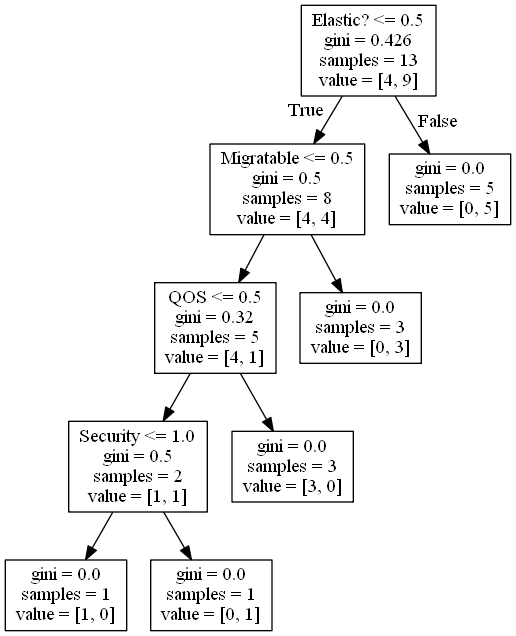

In [28]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

We'll use a random forest of 10 decision trees to predict efficiency of cloudbased on the factors:

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict efficiency of cloud
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]
